# Load Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_length = train_data.index.size
data = pd.concat([train_data, test_data])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


# Feature Engineering

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Title

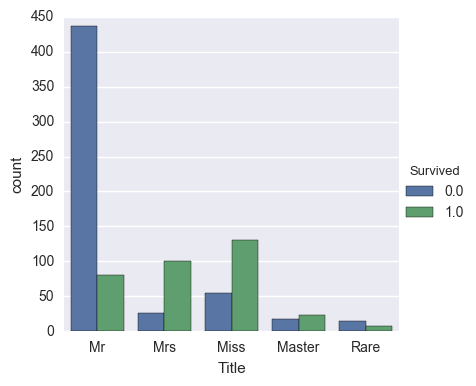

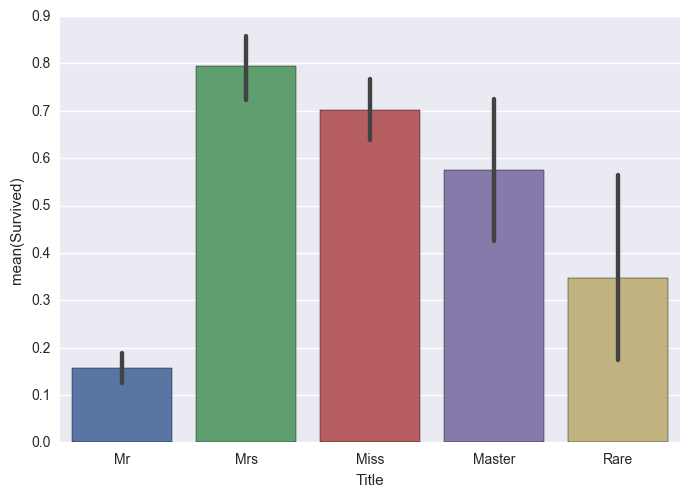

In [4]:
data['Title'] = data.Name.map(lambda name: name.split('.')[0].split(',')[1].strip())
data['Title'] = data.Title.map({'Mr' : 'Mr', 'Miss' : 'Miss', 'Mrs' : 'Mrs', 'Master' : 'Master',
                                "Dr" : 'Rare', "Rev" : 'Rare', "Major" : 'Rare', "Col" : 'Rare',
                                'Mlle' : 'Miss', 'Mme' : 'Mrs', 'Don' : 'Rare', "Dona" : 'Rare',
                                'Lady' : 'Rare', 'the Countess' : 'Rare', 'Jonkheer' : 'Rare',
                                'Sir' : 'Rare', 'Capt' : 'Rare', 'Ms' : 'Miss'})
data['TitleFeature'] = pd.factorize(data.Title)[0]
sns.factorplot(x = 'Title', hue = 'Survived', data = data[:train_length], kind = 'count')
plt.show()
sns.barplot(x = 'Title', y = 'Survived', data = data[:train_length])

## Family Size

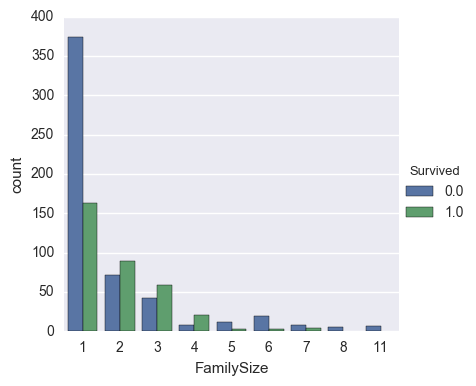

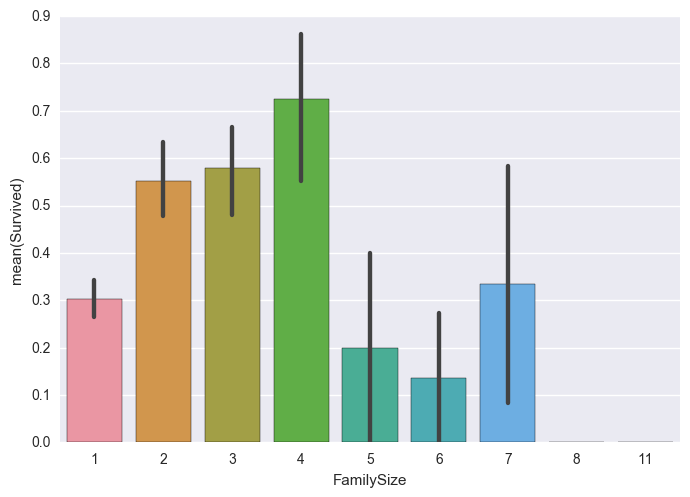

In [5]:
data['FamilySize'] = data.Parch + data.SibSp + 1
data['FamilySizeFeature'] = data.FamilySize
sns.factorplot(x = 'FamilySize', hue = 'Survived', data = data[:train_length], kind = 'count')
plt.show()
sns.barplot(x = 'FamilySize', y = 'Survived', data = data[:train_length])

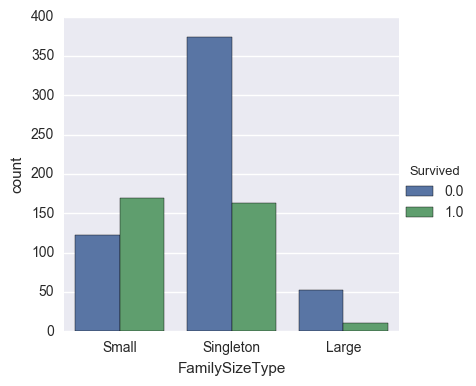

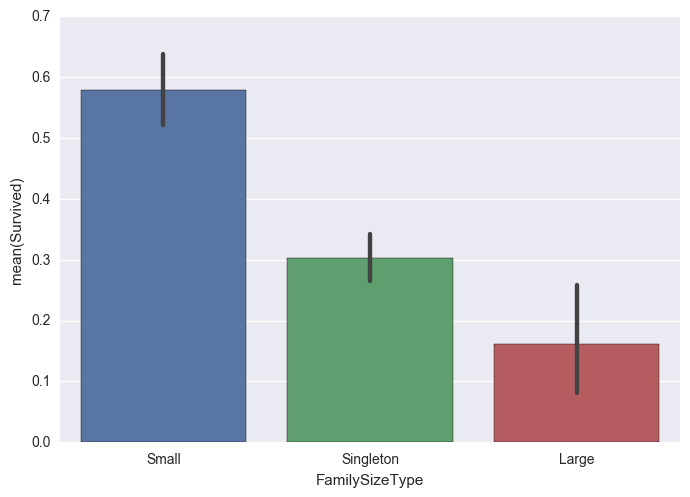

In [6]:
data['FamilySizeType'] = 'Singleton'
data.loc[(data.FamilySize > 1) & (data.FamilySize <= 4), 'FamilySizeType'] = 'Small'
data.loc[data.FamilySize > 4, 'FamilySizeType'] = 'Large'
data['FamilySizeTypeFeature'] = pd.factorize(data.FamilySizeType)[0]
sns.factorplot(x = 'FamilySizeType', hue = 'Survived', data = data[:train_length], kind = 'count')
plt.show()
sns.barplot(x = 'FamilySizeType', y = 'Survived', data = data[:train_length])

## Family ID

In [7]:
has_family_id_feature = False
if has_family_id_feature:
    data['Surname'] = data.Name.map(lambda name: name.split(',')[0].strip().lower())
    data['FamilyId'] = data.apply(lambda row: row.Surname + str(row.FamilySize), axis = 1)
    data.loc[data.FamilySize <= 2, 'FamilyId'] = 'Small'
    data.FamilyId = data.FamilyId.fillna('Small')
    family_id_table = data.FamilyId.value_counts()
    family_id_table = pd.DataFrame({'FamilyId' : family_id_table.keys(), 'Size' : family_id_table.values})
    data.FamilyId = data.FamilyId.map(lambda id: 'Small' if 
                                      (family_id_table[family_id_table.FamilyId == id]['Size'] <= 2).bool() else id)
    data['FamilyIdFeature'] = pd.factorize(data.FamilyId)[0]

## Sex

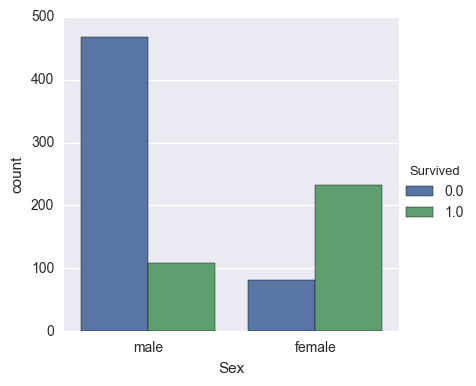

In [8]:
data['SexFeature'] = data.Sex.map({'male' : 0, 'female' : 1})
sns.factorplot(x = 'Sex', hue = 'Survived', data = data[:train_length], kind = 'count')

## Pclass

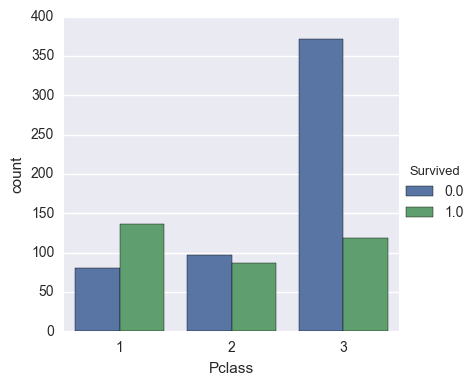

In [9]:
data['PclassFeature'] = data.Pclass
sns.factorplot(x = 'Pclass', hue = 'Survived', data = data[:train_length], kind = 'count')

## Fare

In [10]:
print(data[data.Fare.isnull()][['Pclass', 'Age', 'Sex', 'Embarked']])
print(data[(data.Pclass == 3) & (data.Embarked == 'S')]['Fare'].median())
data['FareFeature'] = data.Fare.fillna(data[(data.Pclass == 3) & (data.Embarked == 'S')]['Fare'].median())

     Pclass   Age   Sex Embarked
152       3  60.5  male        S
8.05


## Embarked

     Fare  Pclass
61   80.0       1
829  80.0       1


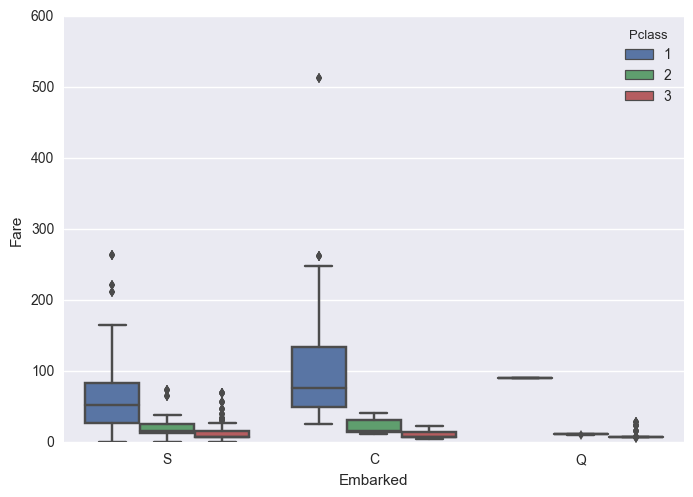

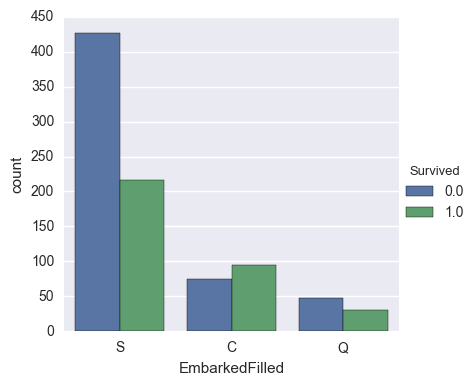

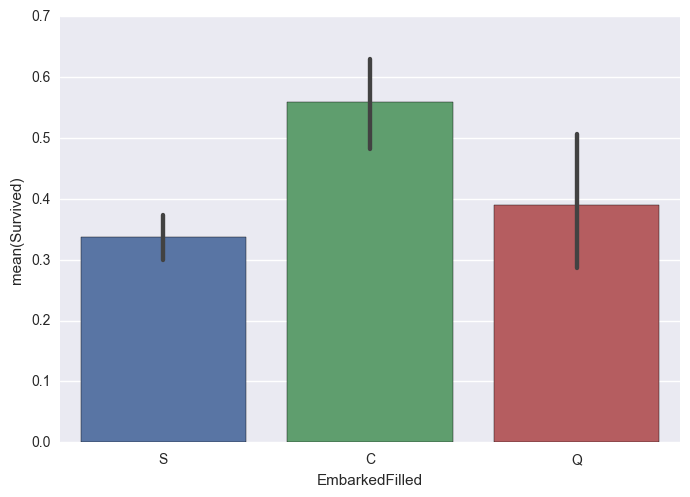

In [11]:
print(data[data.Embarked.isnull()][['Fare', 'Pclass']])
sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Pclass', data = data[data.Embarked.notnull()])
plt.show()
data['EmbarkedFilled'] = data.Embarked.fillna('C')
data['EmbarkedFeature'] = pd.factorize(data.Embarked)[0]
sns.factorplot(x = 'EmbarkedFilled', hue = 'Survived', data = data[:train_length], kind = 'count')
plt.show()
sns.barplot(x = 'EmbarkedFilled', y = 'Survived', data = data[:train_length])

## Cabin

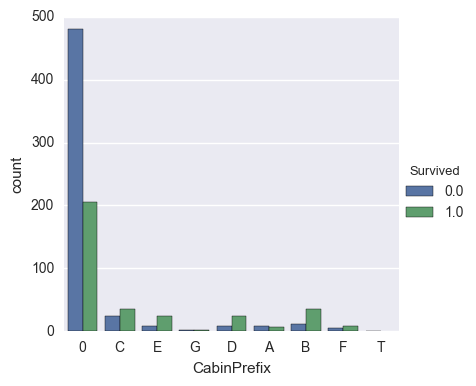

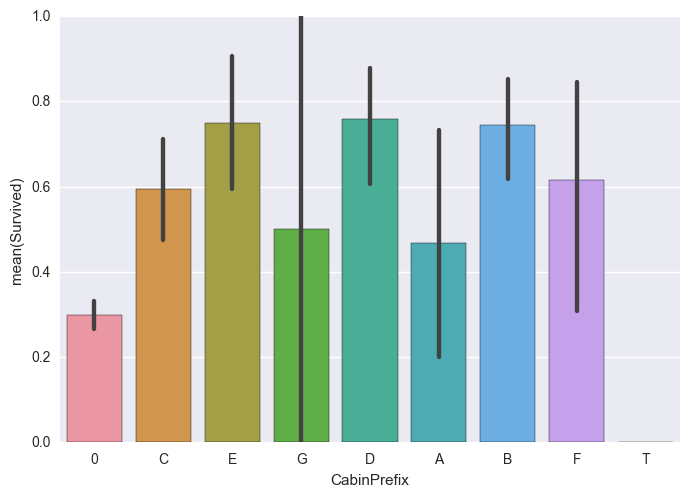

In [12]:
data['Cabin'] = data.Cabin.fillna('0')
data['CabinPrefix'] = data.Cabin.map(lambda cabin: cabin[0])
data['CabinFeature'] = pd.factorize(data.CabinPrefix)[0]
sns.factorplot(x = 'CabinPrefix', hue = 'Survived', data = data[:train_length], kind = 'count')
plt.show()
sns.barplot(x = 'CabinPrefix', y = 'Survived', data = data[:train_length])

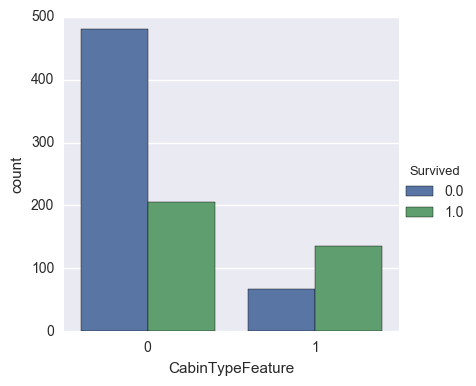

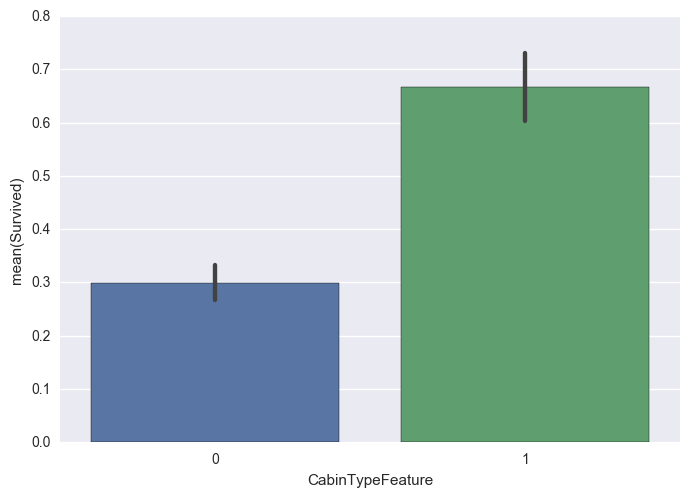

In [13]:
data['CabinTypeFeature'] = 0
data.loc[data.CabinPrefix != '0', 'CabinTypeFeature'] = 1
sns.factorplot(x = 'CabinTypeFeature', hue = 'Survived', data = data[:train_length], kind = 'count')
plt.show()
sns.barplot(x = 'CabinTypeFeature', y = 'Survived', data = data[:train_length])

## Age

[ 0.17481187  0.15696445  0.25108545  0.15794013  0.41138424] 0.230437226348


C:\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


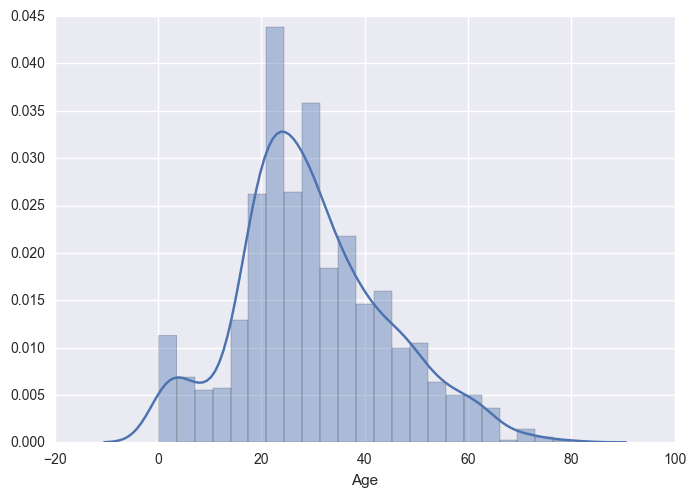

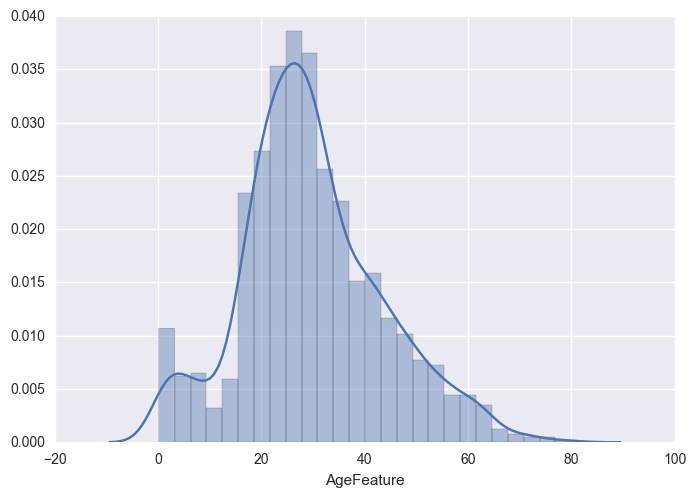

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.cross_validation import cross_val_score

feature_names = data.columns[data.columns.str.contains('Feature')]
Xtrain_age = data[data.Age.notnull()][feature_names]
ytrain_age = data[data.Age.notnull()].Age
regressor = ExtraTreesRegressor()
score = cross_val_score(regressor, Xtrain_age, ytrain_age, cv = 5)
print(score, score.mean())
    
regressor.fit(Xtrain_age, ytrain_age)
Xtest_age = data[data.Age.isnull()][feature_names]
ages = regressor.predict(Xtest_age)
data['AgeFeature'] = data.Age
data.loc[data.Age.isnull(), 'AgeFeature'] = ages

sns.distplot(data.Age[data.Age.notnull()])
plt.show()
sns.distplot(data.AgeFeature)

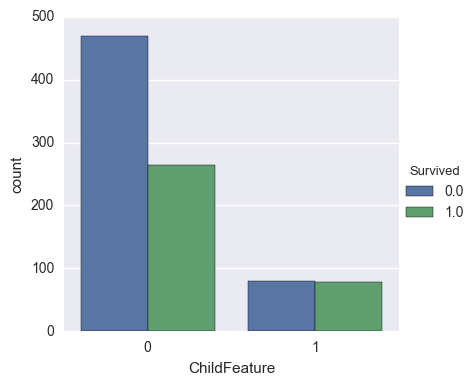

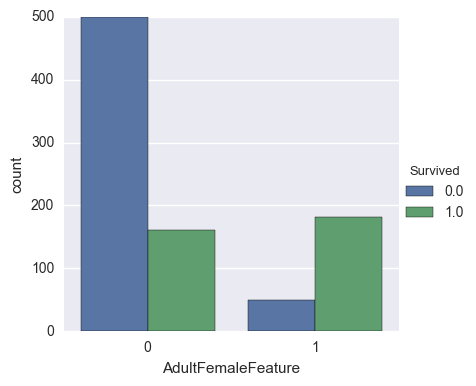

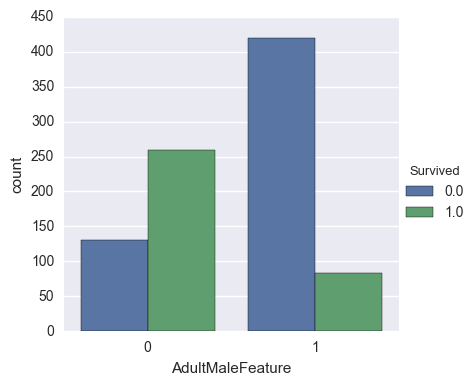

In [15]:
data['ChildFeature'] = 0
data.loc[data.AgeFeature <= 18, 'ChildFeature'] = 1
sns.factorplot(x = 'ChildFeature', hue = 'Survived', data = data[:train_length], kind = 'count')
plt.show()

data['AdultFemaleFeature'] = 0
data.loc[(data.AgeFeature > 18) & (data.Sex == 'female'), 'AdultFemaleFeature'] = 1
sns.factorplot(x = 'AdultFemaleFeature', hue = 'Survived', data = data[:train_length], kind = 'count')
plt.show()

data['AdultMaleFeature'] = 0
data.loc[(data.AgeFeature > 18) & (data.Sex == 'male'), 'AdultMaleFeature'] = 1
sns.factorplot(x = 'AdultMaleFeature', hue = 'Survived', data = data[:train_length], kind = 'count')

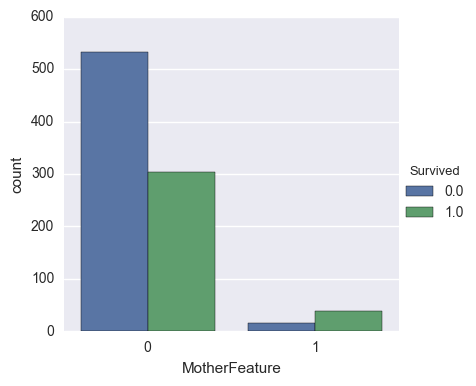

In [16]:
data['MotherFeature'] = 0
data.loc[(data.Sex == 'female') & (data.Parch > 0) & (data.AgeFeature > 18) & (data.Title != 'Miss'), 'MotherFeature'] = 1
sns.factorplot(x = 'MotherFeature', hue = 'Survived', data = data[:train_length], kind = 'count')

## Dead Woman and Survived Man of Surname

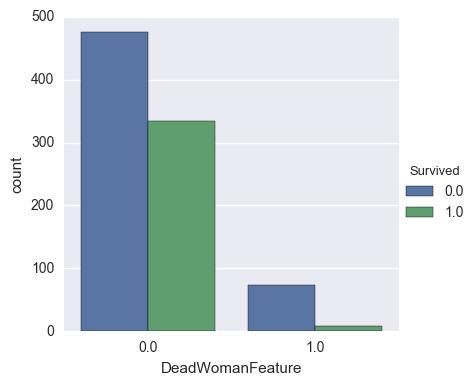

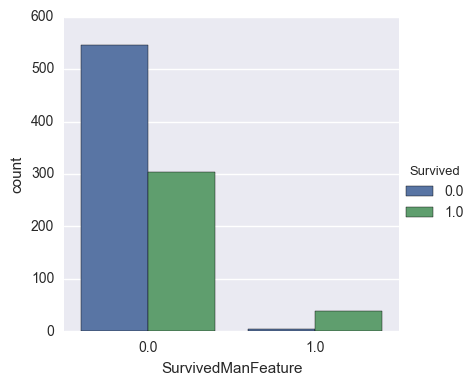

In [17]:
data['Surname'] = data.Name.map(lambda name: name.split(',')[0].strip().lower())
table_surname = pd.DataFrame(data.Surname.value_counts())
table_surname['DeadWomanFeature'] = data.Surname[(data.AdultFemaleFeature == 1) &
                                          (data.Survived == 0) & ((data.Parch > 0) | (data.SibSp > 0))].value_counts()
table_surname['DeadWomanFeature'] = table_surname.DeadWomanFeature.fillna(0)
table_surname.loc[table_surname.DeadWomanFeature > 0, 'DeadWomanFeature'] = 1
table_surname['SurvivedManFeature'] = data.Surname[(data.AdultMaleFeature == 1) &
                                          (data.Survived == 1) & ((data.Parch > 0) | (data.SibSp > 0))].value_counts()
table_surname['SurvivedManFeature'] = table_surname.SurvivedManFeature.fillna(0)
table_surname.loc[table_surname.SurvivedManFeature > 0, 'SurvivedManFeature'] = 1
table_surname.drop('Surname', axis = 1, inplace = True)
data = data.merge(table_surname, left_on = 'Surname', right_index = True, how = 'left')
sns.factorplot(x = 'DeadWomanFeature', hue = 'Survived', data = data[:train_length], kind = 'count')
plt.show()
sns.factorplot(x = 'SurvivedManFeature', hue = 'Survived', data = data[:train_length], kind = 'count')

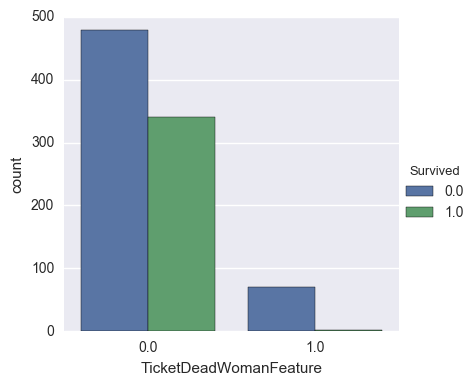

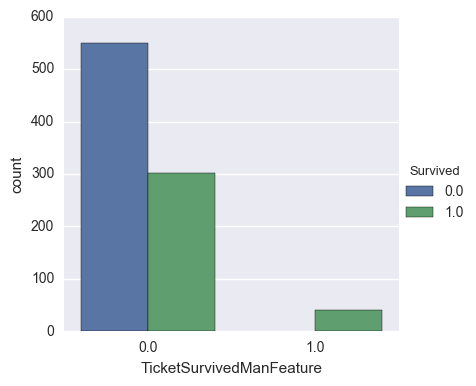

In [18]:
table_ticket = pd.DataFrame(data.Ticket.value_counts())
table_ticket['TicketDeadWomanFeature'] = data.Ticket[(data.AdultFemaleFeature == 1) & (data.Survived == 0) &
                                                     ((data.Parch > 0) | (data.SibSp > 0))].value_counts()
table_ticket['TicketDeadWomanFeature'] = table_ticket.TicketDeadWomanFeature.fillna(0)
table_ticket.loc[table_ticket.TicketDeadWomanFeature > 0, 'TicketDeadWomanFeature'] = 1
table_ticket['TicketSurvivedManFeature'] = data.Ticket[(data.AdultMaleFeature == 1) & (data.Survived == 1) &
                                                       ((data.Parch > 0) | (data.SibSp > 0))].value_counts()
table_ticket['TicketSurvivedManFeature'] = table_ticket.TicketSurvivedManFeature.fillna(0)
table_ticket.loc[table_ticket.TicketSurvivedManFeature > 0, 'TicketSurvivedManFeature'] = 1
table_ticket.drop('Ticket', axis = 1, inplace = True)
data = data.merge(table_ticket, left_on = 'Ticket', right_index = True, how = 'left')
sns.factorplot(x = 'TicketDeadWomanFeature', hue = 'Survived', data = data[:train_length], kind = 'count')
plt.show()
sns.factorplot(x = 'TicketSurvivedManFeature', hue = 'Survived', data = data[:train_length], kind = 'count')

# Modeling

## Feature Selection

In [19]:
feature_names = data.columns[data.columns.str.contains('Feature')]
Xtrain = data[:train_length][feature_names]
ytrain = train_data.Survived
Xtest = data[train_length:][feature_names]

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
extra_classifier = ExtraTreesClassifier(n_estimators = 200)
extra_classifier.fit(Xtrain, ytrain)
importances = pd.DataFrame()
importances['FeatureName'] = Xtrain.columns
importances['Importance'] = extra_classifier.feature_importances_
importances.sort_values('Importance', ascending = False)

,FeatureName,Importance
9,AgeFeature,0.142568
5,FareFeature,0.141606
3,SexFeature,0.115023
12,AdultMaleFeature,0.105261
0,TitleFeature,0.072903
16,TicketDeadWomanFeature,0.059496
14,DeadWomanFeature,0.055537
11,AdultFemaleFeature,0.050825
4,PclassFeature,0.045797
17,TicketSurvivedManFeature,0.042851


In [21]:
from sklearn.feature_selection import SelectFromModel
select_model = SelectFromModel(extra_classifier, prefit = True)
Xtrain_selected = select_model.transform(Xtrain)
Xtest_selected = select_model.transform(Xtest)
Xtrain_selected.shape, Xtest_selected.shape, select_model

((891, 6),
 (418, 6),
 SelectFromModel(estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
         prefit=True, threshold=None))

## Parameters Tuning

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

random_forest = RandomForestClassifier()
parameter_grid = {'max_features' : [None, 'sqrt', 'log2'],
                  'max_depth' : [4, 5, 6, 7, 8], 
                  'n_estimators' : [200, 250, 500],
                  # 'n_estimators' : [200, 250, 500, 1000, 2000],
                  'criterion' : ['gini', 'entropy']}
grid_search = GridSearchCV(random_forest, param_grid = parameter_grid)
grid_search.fit(Xtrain, ytrain)
print('Best Score: {}'.format(grid_search.best_score_))
print('Best Parameter: {}'.format(grid_search.best_params_))

Best Score: 0.8888888888888888
Best Parameter: {'n_estimators': 200, 'max_depth': 8, 'max_features': None, 'criterion': 'gini'}


## Predict

In [23]:
survived = grid_search.predict(Xtest)
predict_data = pd.DataFrame()
predict_data['PassengerId'] = test_data.PassengerId
predict_data['Survived'] = survived.astype(int)
predict_data.to_csv('predict.csv', index = False)
survived.sum(), len(survived)

(158, 418)

## Cross Validation

In [24]:
random_forest = RandomForestClassifier(n_estimators = 250, max_depth = 8, criterion = 'entropy', max_features = None)
score = cross_val_score(random_forest, Xtrain, ytrain, cv = 10)
print(score)
print(score.mean())

[ 0.84444444  0.91111111  0.80898876  0.93258427  0.93258427  0.86516854
  0.93258427  0.88764045  0.93258427  0.875     ]
0.892269038702


In [25]:
random_forest.fit(Xtrain, ytrain)
survived = random_forest.predict(Xtest)
predict_data = pd.DataFrame()
predict_data['PassengerId'] = test_data.PassengerId
predict_data['Survived'] = survived.astype(int)
predict_data.to_csv('predict_validation.csv', index = False)
survived.sum(), len(survived)

(158, 418)